<a href="https://colab.research.google.com/github/beloshh/MLtask/blob/master/MLtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline




In [0]:
plate_number_dir = '/content/drive/My Drive/plate_number/'
negative_images_dir = '/content/drive/My Drive/negative_images/'
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
plate_number_img = [plate_number_dir+i for i in os.listdir(plate_number_dir)]
negative_images_img = [negative_images_dir+i for i in os.listdir(negative_images_dir)]

In [0]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  resized_img = cv2.resize(img, (ROWS,COLS), interpolation = cv2.INTER_AREA)
  return resized_img

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  X = np.ndarray((n_x,m), dtype = np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  for i,image_file in enumerate(images):
    image = read_image(image_file)
    # print(i,'done')
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower():
      y[0,i] = 1 
    elif 'IMG' in image_filename.lower():
      y[0,i] = 0
    if i%100 == 0 :
      print("Proceed {} of {}".format(i,m))
    return X,y

In [0]:
plate_img, negative_img = prep_data(plate_number_img + negative_images_img)

X.shape is (12288, 113)
Proceed 0 of 113


In [0]:
classes = {0: 'Negative_Image',1: 'Plate_Number'}

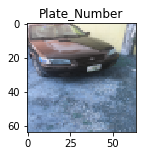

In [0]:
def show_images(X, y, idx):
  image = X[idx]
  image = image.reshape((ROWS,COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image),
  plt.title(classes[y[idx,0]])
  plt.show()
show_images(plate_img.T, negative_img.T, 0)

In [0]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T.ravel()
clf.fit(plate_img_lr, neg_img_lr)
print("Model accuracy: {:.2f}%".format(clf.score(plate_img_lr, neg_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Model accuracy: 100.00%


In [0]:
def show_image_prediction (X, idx, model):
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS,COLS,CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

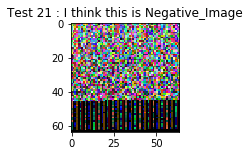

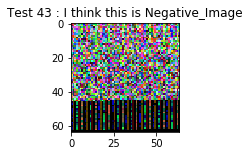

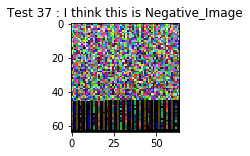

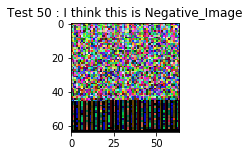

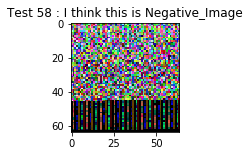

In [0]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T
for i in np.random.randint(0, len(plate_img_lr), 5):
   show_image_prediction(plate_img_lr, i, clf)